In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('apartments-wroclaw.csv', delimiter=';')

In [4]:
print(data)
print(data.columns)

                                                  title  \
0              okazja apartament mieszkanie dwupokojowe   
1     3 pokojowe mieszkanie na sprzedaż/ kredyt #naS...   
2       Słoneczny apartament, miejsce postojowe w cenie   
3      3-pokojowe mieszkanie 66m2 + balkon Bezpośrednio   
4                   2-pokojowe mieszkanie 41m2 + balkon   
...                                                 ...   
9839              3-pokojowe mieszkanie w samym centrum   
9840  Promocja l 2 pokoje na Lipie Piotrowskiej l Ba...   
9841                Klimatyczne mieszkanie w kamienicy.   
9842           Gotowe 3 pokoje z ogródkiem na Zakrzowie   
9843            4-pokojowe mieszkanie 101m2 + 2 balkony   

                                                address      price  rooms  \
0            Gajowice, Fabryczna, Wrocław, dolnośląskie   569000.0      2   
1     ul. Eugeniusza Horbaczewskiego, Gądów, Fabrycz...   750000.0      3   
2     ul. Babiego Lata, Krzyki, Krzyki, Wrocław, dol...   86

In [5]:
for col in data.columns:
  print(col,
      pd.unique(data[col]))

title ['okazja apartament mieszkanie dwupokojowe'
 '3 pokojowe mieszkanie na sprzedaż/ kredyt #naStart'
 'Słoneczny apartament, miejsce postojowe w cenie' ...
 '3-pokojowe mieszkanie w samym centrum'
 'Klimatyczne mieszkanie w kamienicy.'
 'Gotowe 3 pokoje z ogródkiem na Zakrzowie']
address ['Gajowice, Fabryczna, Wrocław, dolnośląskie'
 'ul. Eugeniusza Horbaczewskiego, Gądów, Fabryczna, Wrocław, dolnośląskie'
 'ul. Babiego Lata, Krzyki, Krzyki, Wrocław, dolnośląskie' ...
 'ul. Racławicka 100, Grabiszynek, Fabryczna, Wrocław, dolnośląskie'
 'Strawińskiego, Jagodno, Krzyki, Wrocław, dolnośląskie'
 'Al. Władysława Sikorskiego, Szczepin, Stare Miasto, Wrocław, dolnośląskie']
price [ 569000.  750000.  865000. ... 1595712.  549670. 1260861.]
rooms [ 2  3  4  5  1  6  8 10 11  7  9]
area [39.19 63.6  50.   ... 88.8  61.16 83.11]
floor ['2' '4' '3' '1' '5' '10' 'parter' '10+' '6' '9' '8' '0' '7' 'suterena'
 nan 'poddasze' '11']
max_floor [ 7. 11.  4.  2. 10.  5.  1.  3.  8.  6. 17.  9. nan 16.

In [6]:
for col in data.columns:
  print(col,
      data[col].isna().sum())

title 0
address 0
price 781
rooms 0
area 0
floor 139
max_floor 661
rent 5294
energy_certificate 9354
form_of_the_property 1939
finishing_condition 2907
balcony_garden_terrace 2397
parking_place 4228
heating 2797
market 1274
advertisement_type 1274
year_of_construction 2776
type_of_development 2933
windows 4243
is_elevator 1274


In [7]:
target_feature = 'price'
features = ['rooms', 'area', 'floor', 'max_floor', 'market', 'year_of_construction', 'finishing_condition', 'is_elevator']
features_and_target = features + [target_feature]

In [8]:
data_cleaned = data[features_and_target]
for feature in features_and_target:
  data_cleaned = data_cleaned[~data_cleaned[feature].isna()]
print(data_cleaned.shape)

(4571, 9)


In [9]:
data_cleaned = data_cleaned[data_cleaned['floor'] != 'suterena']
data_cleaned = data_cleaned[data_cleaned['floor'] != 'poddasze']
data_cleaned['floor'] = data_cleaned['floor'].replace('parter', '0')
data_cleaned['floor'] = data_cleaned['floor'].replace('10+', '11')
data_cleaned['floor'] = data_cleaned['floor'].astype(int)

In [10]:
for col in data_cleaned.columns:
  print(col,
      pd.unique(data_cleaned[col]))

rooms [ 2  3  4  5  1  6 10  8  7  9]
area [39.19 63.6  50.   ... 91.35 88.8  63.82]
floor [ 2  4  3  0 11  1  5  6  9  7  8 10]
max_floor [ 7. 11.  4.  5.  3.  6. 10.  2.  8.  9. 18.  1. 23. 48. 16. 17. 14. 12.
 15. 13. 22. 20. 52. 19. 51. 28.]
market ['wtórny' 'pierwotny']
year_of_construction [2.0240e+03 1.9800e+03 2.0150e+03 1.9020e+03 1.9680e+03 2.0080e+03
 2.0190e+03 1.8900e+03 2.0200e+03 2.0220e+03 1.9300e+03 2.0160e+03
 2.0250e+03 1.9600e+03 2.0140e+03 1.9000e+03 2.0010e+03 1.9250e+03
 2.0230e+03 1.9730e+03 2.0120e+03 2.0000e+03 2.0130e+03 1.9040e+03
 2.0020e+03 2.0110e+03 1.9110e+03 2.0170e+03 2.0030e+03 1.9850e+03
 2.0100e+03 1.9630e+03 1.8890e+03 1.9650e+03 2.0050e+03 1.9050e+03
 2.0210e+03 2.0040e+03 1.9710e+03 1.9870e+03 1.9620e+03 1.9750e+03
 2.0060e+03 1.9920e+03 1.9880e+03 1.9200e+03 2.0180e+03 1.9840e+03
 1.9760e+03 1.9570e+03 1.9070e+03 1.9930e+03 1.9500e+03 1.8880e+03
 1.9780e+03 1.9900e+03 1.9060e+03 1.9640e+03 1.9350e+03 1.9910e+03
 1.9810e+03 1.9890e+03 2.0090e+03

In [11]:
print(data_cleaned.shape)

(4567, 9)


change str to category numbers


In [12]:
data_cleaned['market'] = data_cleaned['market'].astype('category')
data_cleaned['finishing_condition'] = data_cleaned['finishing_condition'].astype('category')
data_cleaned['is_elevator'] = data_cleaned['is_elevator'].astype('category')

In [13]:
data_cleaned['market'].cat.categories

Index(['pierwotny', 'wtórny'], dtype='object')

In [14]:
data_cat = data_cleaned.copy()
data_cat['market'] = data_cat['market'].cat.codes
data_cat['finishing_condition'] = data_cat['finishing_condition'].cat.codes
data_cat['is_elevator'] = data_cat['is_elevator'].cat.codes

In [15]:
for col in data_cat.columns:
  print(col,
      pd.unique(data_cat[col]))

rooms [ 2  3  4  5  1  6 10  8  7  9]
area [39.19 63.6  50.   ... 91.35 88.8  63.82]
floor [ 2  4  3  0 11  1  5  6  9  7  8 10]
max_floor [ 7. 11.  4.  5.  3.  6. 10.  2.  8.  9. 18.  1. 23. 48. 16. 17. 14. 12.
 15. 13. 22. 20. 52. 19. 51. 28.]
market [1 0]
year_of_construction [2.0240e+03 1.9800e+03 2.0150e+03 1.9020e+03 1.9680e+03 2.0080e+03
 2.0190e+03 1.8900e+03 2.0200e+03 2.0220e+03 1.9300e+03 2.0160e+03
 2.0250e+03 1.9600e+03 2.0140e+03 1.9000e+03 2.0010e+03 1.9250e+03
 2.0230e+03 1.9730e+03 2.0120e+03 2.0000e+03 2.0130e+03 1.9040e+03
 2.0020e+03 2.0110e+03 1.9110e+03 2.0170e+03 2.0030e+03 1.9850e+03
 2.0100e+03 1.9630e+03 1.8890e+03 1.9650e+03 2.0050e+03 1.9050e+03
 2.0210e+03 2.0040e+03 1.9710e+03 1.9870e+03 1.9620e+03 1.9750e+03
 2.0060e+03 1.9920e+03 1.9880e+03 1.9200e+03 2.0180e+03 1.9840e+03
 1.9760e+03 1.9570e+03 1.9070e+03 1.9930e+03 1.9500e+03 1.8880e+03
 1.9780e+03 1.9900e+03 1.9060e+03 1.9640e+03 1.9350e+03 1.9910e+03
 1.9810e+03 1.9890e+03 2.0090e+03 1.9950e+03 1.970

one hot encoding

In [16]:
def price_hist(threshold=np.inf):
  # Generate random data
  data = data_cat['price'].to_numpy()
  data = data[data<threshold]
  # Create the histogram
  plt.hist(data, bins=30, edgecolor='black')

  # Add titles and labels
  plt.title('Histogram of Random Data')
  plt.xlabel('Value')
  plt.ylabel('Frequency')

  # Show the plot
  plt.show()


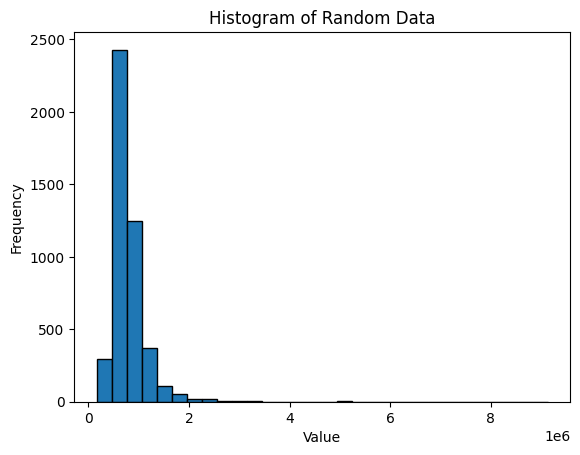

In [17]:
price_hist()

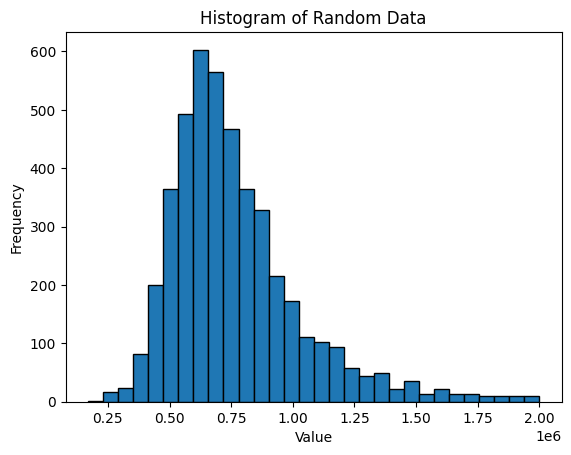

In [18]:
price_hist(2000000)

zrob wykres gdzie sa 3 histogramy przezroczyste nalozone na siebie, kazdy pokazuje rozklad ceny dla probek z kazdego typu wykonczenia

In [19]:
data_cat = data_cat[data_cat['price'] < 2000000]

In [20]:
print(data_cat.shape)

(4510, 9)


In [21]:
data_one_hot = pd.get_dummies(data_cat, columns=['finishing_condition'])
print(data_one_hot)

      rooms   area  floor  max_floor  market  year_of_construction  \
0         2  39.19      2        7.0       1                2024.0   
1         3  63.60      4       11.0       1                1980.0   
2         2  50.00      3        4.0       1                2015.0   
9         2  46.00      0        5.0       1                1902.0   
10        3  46.03     11       11.0       1                1968.0   
...     ...    ...    ...        ...     ...                   ...   
9837      3  71.90      0        1.0       0                2023.0   
9839      3  70.60      3        6.0       0                2024.0   
9840      2  42.20      0        2.0       0                2025.0   
9841      2  60.00      1        4.0       1                1910.0   
9842      3  63.82      0        4.0       0                2023.0   

      is_elevator      price  finishing_condition_0  finishing_condition_1  \
0               1   569000.0                  False                   True   
1  

In [22]:
X = data_one_hot.drop(columns=[target_feature]).to_numpy().astype(np.float32)
y = data_one_hot[target_feature].to_numpy().astype(np.float32)
y = y/X[:, 1] # wezmy cene za metr kwadratowy
print(X[:10], y[:10], X.shape, y.shape)

[[2.000e+00 3.919e+01 2.000e+00 7.000e+00 1.000e+00 2.024e+03 1.000e+00
  0.000e+00 1.000e+00 0.000e+00]
 [3.000e+00 6.360e+01 4.000e+00 1.100e+01 1.000e+00 1.980e+03 1.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 5.000e+01 3.000e+00 4.000e+00 1.000e+00 2.015e+03 1.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 4.600e+01 0.000e+00 5.000e+00 1.000e+00 1.902e+03 0.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [3.000e+00 4.603e+01 1.100e+01 1.100e+01 1.000e+00 1.968e+03 1.000e+00
  1.000e+00 0.000e+00 0.000e+00]
 [4.000e+00 6.630e+01 1.000e+00 4.000e+00 1.000e+00 2.024e+03 1.000e+00
  0.000e+00 1.000e+00 0.000e+00]
 [5.000e+00 7.613e+01 3.000e+00 3.000e+00 1.000e+00 2.008e+03 0.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 4.920e+01 1.000e+00 4.000e+00 1.000e+00 2.019e+03 1.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 4.800e+01 1.000e+00 4.000e+00 1.000e+00 1.890e+03 0.000e+00
  0.000e+00 0.000e+00 1.000e+00]
 [2.000e+00 4.985e+01 1.000e+00 6.000e+00 0.000e+00 2.0

podzial na zbiory

In [23]:
from sklearn.model_selection import train_test_split



In [24]:
X_train = np.random.rand(100, 3)
y_train = np.random.randint(0, 2, 100)
print(X_train, y_train)

[[9.59425926e-01 9.45291928e-01 3.41965283e-01]
 [8.35050148e-01 4.96670615e-01 6.12739699e-01]
 [6.39849977e-01 1.03805561e-01 2.71606871e-01]
 [7.16218517e-01 1.39064302e-01 8.41300059e-01]
 [1.20203301e-01 3.19179706e-01 7.08199282e-01]
 [4.01361996e-01 8.61705593e-01 3.82432229e-01]
 [4.21510965e-01 8.57313090e-01 5.52875375e-01]
 [4.50946735e-01 6.33656090e-01 9.49462726e-01]
 [7.97804692e-01 3.88253906e-02 6.48313587e-01]
 [6.48459748e-01 8.29635565e-01 9.20616623e-01]
 [2.02512099e-01 2.10611400e-02 9.03251816e-01]
 [8.67616927e-01 9.58630434e-01 4.85683024e-01]
 [3.56838131e-01 3.97660622e-01 1.33701470e-01]
 [6.42091013e-01 2.96793381e-01 6.74320579e-01]
 [4.61963029e-01 4.92010186e-01 2.17175467e-01]
 [5.02193931e-01 7.30206593e-01 9.26509375e-04]
 [3.55979567e-01 4.50666553e-01 5.33383199e-03]
 [8.51133065e-01 4.04484031e-01 1.97699702e-01]
 [3.17628185e-01 3.84352664e-01 1.52334610e-01]
 [3.18066954e-01 9.60944863e-01 4.63559640e-01]
 [2.65219316e-01 4.86011128e-01 7.743976

In [25]:
X_test = np.random.rand(20, 3)
y_test = np.random.randint(0, 2, 20)
print(X_test, y_test)

[[0.02074511 0.68292506 0.57197232]
 [0.38268875 0.66780732 0.79622879]
 [0.35940335 0.95051287 0.0246178 ]
 [0.23404345 0.75474143 0.60341556]
 [0.83540725 0.16253195 0.33839922]
 [0.14214664 0.16753768 0.98645428]
 [0.50696021 0.82323108 0.75724248]
 [0.5608259  0.98093727 0.3752813 ]
 [0.11633282 0.18997772 0.59328601]
 [0.3649803  0.37395027 0.92623294]
 [0.14451975 0.22811571 0.78492371]
 [0.99842226 0.60926548 0.43071553]
 [0.45573815 0.97932776 0.65914401]
 [0.23907315 0.53489682 0.92643211]
 [0.38962926 0.52989957 0.14790433]
 [0.23426528 0.07020955 0.23034476]
 [0.3871055  0.10523296 0.96037886]
 [0.59116045 0.93392955 0.74323843]
 [0.19290514 0.45811486 0.48318159]
 [0.6744674  0.3697471  0.14660578]] [1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1]


In [26]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [30]:
results = []
for c in param_grid['C']:
  for gamma in param_grid['gamma']:
    svc = SVC(C=c, gamma=gamma)
    svc.fit(X_train, y_train)
    results.append((svc.score(X_test, y_test)))
    print(c, gamma)

0.001 0.001
0.001 0.01
0.001 0.1
0.001 1
0.001 10
0.001 100
0.01 0.001
0.01 0.01
0.01 0.1
0.01 1
0.01 10
0.01 100
0.1 0.001
0.1 0.01
0.1 0.1
0.1 1
0.1 10
0.1 100
1 0.001
1 0.01
1 0.1
1 1
1 10
1 100
10 0.001
10 0.01
10 0.1
10 1
10 10
10 100
100 0.001
100 0.01
100 0.1
100 1
100 10
100 100


In [31]:
svc = sorted(results, key=lambda x: x[0])[-1][1]

TypeError: 'float' object is not subscriptable

In [ ]:
svc.score(X_test, y_test)

0.55

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=420)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=420)

In [34]:
print(X_train.shape, X_val.shape, X_test.shape)

(3044, 10) (1015, 10) (451, 10)


srednia 0 + odchylenie std 1


In [35]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_scaler.fit(X_train)

X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X_val = X_scaler.transform(X_val)

y_scaler = StandardScaler()
y_scaler.fit(y_train.reshape(-1, 1))

y_train = y_scaler.transform(y_train.reshape(-1, 1)).flatten()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()
y_val = y_scaler.transform(y_val.reshape(-1, 1)).flatten()

In [36]:
print(y_train)

[-0.03933304 -0.25079998 -1.0334543  ... -1.0937322  -0.31371662
 -0.924719  ]


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)

print(mean_squared_error(model_lin.predict(X_train), y_train),
      mean_squared_error(model_lin.predict(X_val), y_val))

0.61612606 0.6635621


In [38]:
for i in range(10):
  print( y_scaler.inverse_transform(y_val[i].reshape(-1, 1)).flatten(), y_scaler.inverse_transform(model_lin.predict(X_val[i].reshape(1, -1))[0].reshape(-1, 1)).flatten())

[14276.243] [15477.134]
[13074.98] [11468.556]
[19560.283] [14078.113]
[10551.181] [12161.341]
[12268.278] [13025.433]
[11934.157] [11792.921]
[10689.985] [13036.727]
[13003.356] [14069.821]
[15441.177] [11983.781]
[17588.963] [16407.568]


In [39]:
X_train_t = torch.tensor(X_train)
X_test_t = torch.tensor(X_test)
X_val_t = torch.tensor(X_val)

y_train_t = torch.tensor(y_train)
y_test_t = torch.tensor(y_test)
y_val_t = torch.tensor(y_val)

In [40]:
class Net(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.net = torch.nn.Sequential(
        torch.nn.Linear(10, 256),
        torch.nn.ReLU(),
        torch.nn.Dropout(.3),
        torch.nn.Linear(256, 128),
        torch.nn.ReLU(),
        torch.nn.Dropout(.3),
        torch.nn.Linear(128, 1),
      # torch.nn.Linear(10, 1)
    )

  def forward(self, x):
    # x.shape = (n_samples, m_features)
    return self.net(x)

In [41]:
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(X_train_t, y_train_t)
val_dataset = TensorDataset(X_val_t, y_val_t)

batch_size = 16 # po ile probek na raz  ktorycg bedzeie srednia zamin beedizemy uczyc
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # iterator do robienia batchy
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True) # iterator do robienia batchy

In [42]:
net = Net()
lr = 0.001
n_epochs = 100 # ile razy 1 datraset vbedfzeimy mielic przez siec

optim = torch.optim.Adam(net.parameters(), lr=lr) # taki leopszy algorym go liczenia gradientu
loss = torch.nn.MSELoss()

for i in range(n_epochs):
  loss_sum = 0
  for inputs, targets in train_dataloader:

    outputs = net(inputs)
    l = loss(outputs.flatten(), targets)
    l.backward()
    with torch.no_grad():
      loss_sum += l*inputs.shape[0]
      # loss_sum += mean_squared_error(model_lin.predict(inputs), targets)
      optim.step()
      optim.zero_grad()

  with torch.no_grad():
    print(i, (loss_sum/X_train_t.shape[0]).item(), loss(net(X_val_t).flatten(), y_val_t).item())

0 0.6349270343780518 0.6484723091125488
1 0.607154130935669 0.6189397573471069
2 0.5712355375289917 0.607807993888855
3 0.5636972188949585 0.5947218537330627
4 0.5611659288406372 0.5910079479217529
5 0.5382540225982666 0.60186767578125
6 0.5253379940986633 0.5677241086959839
7 0.5253933668136597 0.5793014168739319
8 0.5419711470603943 0.550758957862854
9 0.5156473517417908 0.5492950081825256
10 0.5157026648521423 0.5551953315734863
11 0.5121889710426331 0.5551531314849854
12 0.49406906962394714 0.5567882061004639
13 0.5082519054412842 0.5520416498184204
14 0.4967869818210602 0.5500093698501587
15 0.5049730539321899 0.5458798408508301
16 0.49962469935417175 0.5751463174819946
17 0.49328476190567017 0.5568180084228516
18 0.49277740716934204 0.5629428029060364
19 0.49533727765083313 0.5654590129852295
20 0.47949713468551636 0.6022308468818665
21 0.48515769839286804 0.5476052761077881
22 0.4850998818874359 0.5653956532478333
23 0.48440635204315186 0.5475192070007324
24 0.47477835416793823 

In [43]:
net.eval()
print(loss(net(X_val_t).flatten(), y_val_t).item())

preds_unscaled = y_scaler.inverse_transform(net(X_val_t).detach().numpy()).flatten()

targets_unscaled = y_scaler.inverse_transform(y_val_t.reshape(-1, 1)).flatten()
print(mean_squared_error(preds_unscaled, targets_unscaled))

0.4631926715373993
5245823.3756263945


In [45]:
print(preds_unscaled, targets_unscaled)

[15428.055 12818.441 15273.15  ...  9890.779 13120.121 11644.853] [14276.24316009 13074.98043944 19560.28325337 ...  8530.56551616
 11308.01659423  8357.34849513]


In [49]:
print(np.mean(np.abs(preds_unscaled- targets_unscaled)))
print(np.mean(np.abs( y_scaler.inverse_transform(model_lin.predict(X_val_t).reshape(-1, 1)).flatten() - targets_unscaled)))

1581.0571925676056
1940.851340401257


In [53]:
# Odpal najpierw komurkte 51 bo najpisales 
# zrob zmienna xyz_scaled
print(np.mean(np.abs(preds_unscaled * X_val[:, 1]- targets_unscaled * X_val[:, 1])))
print(np.mean(np.abs( y_scaler.inverse_transform(model_lin.predict(X_val_t).reshape(-1, 1)).flatten()* X_val[:, 1] - targets_unscaled* X_val[:, 1])))

89692.75605563018
109633.29051340028
